# Digit Recognizer

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

## 1. Load and Prepare Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

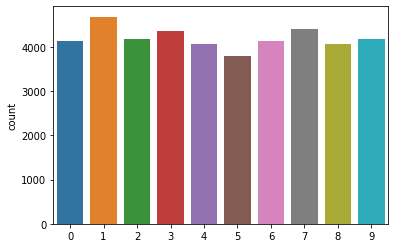

In [3]:
x_train = train.drop("label", axis=1).to_numpy()
y_train = train["label"].to_numpy()
label_counts = sns.countplot(y_train)

# 2. Train
## 2.1. Multiclass classification

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))

In [5]:
# Support vector classifier using one vs one strategy
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
svm_clf = SVC(gamma="auto", random_state=42)
svm_clf_scores = cross_val_score(svm_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")
svm_clf_scores.mean()

0.9562380952380952

In [6]:
# Support vector classifier using one vs rest strategy
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(gamma="auto", random_state=42))
ovr_clf_scores = cross_val_score(ovr_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")
ovr_clf_scores.mean()

0.9564761904761906

In [7]:
# Stochastic gradient descent classifier
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)
sgd_clf_scores = cross_val_score(sgd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")
sgd_clf_scores.mean()

0.9084761904761903

In [8]:
# K-nearest neighbours classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf_scores = cross_val_score(knn_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")
knn_clf_scores.mean()

0.9387619047619048

In [9]:
# Random forest classifier
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf_scores = cross_val_score(rnd_clf, x_train_scaled, y_train, cv=3, scoring="accuracy")
rnd_clf_scores.mean()

0.9607380952380953

## 2.2. Neural networks and deep learning

In [10]:
import tensorflow as tf
from tensorflow import keras

In [18]:
x_train = (train.iloc[:,1:].values).astype('float32')
x_train = x_train.reshape(x_train.shape[0], 28, 28)
y_train = train.iloc[:,0].values.astype('int32')
x_train.shape

(42000, 28, 28)

In [19]:
x_train = x_train / 255.
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)

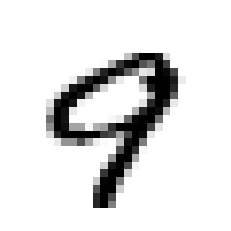

In [13]:
import matplotlib.pyplot as plt
plt.imshow(x_train[100], cmap="binary")
plt.axis('off')
plt.show()

In [14]:
# Multi-layer perceptron classifier
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
1313/1313 [==============================] - 2s 2ms/step - loss: 1.9324 - accuracy: 0.4634
Epoch 2/100
1313/1313 [==============================] - 2s 2ms/step - loss: 1.1325 - accuracy: 0.7909
Epoch 3/100
1313/1313 [==============================] - 2s 1ms/step - loss: 0.7346 - accuracy: 0.8401
Epoch 4/100
1313/1313 [==============================] - 2s 1ms/step - loss: 0.5734 - accuracy: 0.8615
Epoch 5/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.4926 - accuracy: 0.8746
Epoch 6/100
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4440 - accuracy: 0.8825
Epoch 7/100
1313/1313 [==============================] - 2s 1ms/step - loss: 0.4114 - accuracy: 0.8889
Epoch 8/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.3876 - accuracy: 0.8929
Epoch 9/100
1313/1313 [==============================] - 2s 1ms/step - loss: 0.3692 - accuracy: 0.8969
Epoch 10/100
1313/1313 [==============================] - 2s 2ms/step - l

In [20]:
x_train = x_train[..., np.newaxis]

In [21]:
# Convolutional neural network
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
    keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
    keras.layers.Conv2D(64, kernel_size=3, padding="same", activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="categorical_crossentropy",
              optimizer="nadam",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 90s 69ms/step - loss: 0.2171 - accuracy: 0.9334
Epoch 2/10
1313/1313 [==============================] - 93s 71ms/step - loss: 0.0891 - accuracy: 0.9728
Epoch 3/10
1313/1313 [==============================] - 85s 65ms/step - loss: 0.0665 - accuracy: 0.9797
Epoch 4/10
1313/1313 [==============================] - 85s 65ms/step - loss: 0.0522 - accuracy: 0.9834
Epoch 5/10
1313/1313 [==============================] - 83s 63ms/step - loss: 0.0452 - accuracy: 0.9857
Epoch 6/10
1313/1313 [==============================] - 85s 65ms/step - loss: 0.0393 - accuracy: 0.9870
Epoch 7/10
1313/1313 [==============================] - 84s 64ms/step - loss: 0.0364 - accuracy: 0.9889
Epoch 8/10
1313/1313 [==============================] - 103s 79ms/step - loss: 0.0316 - accuracy: 0.9894
Epoch 9/10
1313/1313 [==============================] - 105s 80ms/step - loss: 0.0281 - accuracy: 0.9911
Epoch 10/10
1313/1313 [==============================] - 88s 6

# 3. Submit prediction

In [22]:
x_test = (test.iloc[:,:].values).astype('float32')
x_test = x_test.reshape(-1, 28, 28)
x_test = x_test / 255.
x_test = x_test[..., np.newaxis]

In [23]:
image_id = np.arange(1, x_test.shape[0] + 1)
label_predict = model.predict(x_test)

In [24]:
from numpy import argmax
predictions = np.column_stack((image_id, argmax(label_predict, axis=1))).astype(int)
df = pd.DataFrame(data=predictions, columns=["ImageId","Label"])
df.to_csv('submission.csv', index=False)